In [3]:
%pip install BioPython
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
#import
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
from Bio import PDB
from Bio.SeqUtils import GC
from Bio.SeqUtils import MeltingTemp as mt
from Bio.SeqUtils import molecular_weight as mw 
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
#Dari file fasta dan genbank yang 
# ada print can id, description dan seqnya

#fasta

for record in SeqIO.parse('Asset/sequence.fasta', 'fasta'):
    print("Record Fasta")
    print("ID       : ", record.id)
    print("Name     : ", record.name)
    print("Desc     : ", record.description)
    print("Sequence : ", record.seq)

#genbank
for record in SeqIO.parse('Asset/sequence.gb', 'gb'):
    print("Record Genbank")
    print("ID       : ", record.id)
    print("Name     : ", record.name)
    print("Desc     : ", record.description)
    print("Sequence : ", record.seq)


Record Fasta
ID       :  AY892288.1
Name     :  AY892288.1
Desc     :  AY892288.1 Synthetic construct Homo sapiens clone FLH014428.01L TAR (HIV) mRNA, partial cds
Sequence :  ATGAGTGAAGAGGAGCAAGGCTCCGGCACTACCACGGGCTGCGGGCTGCCTAGTATAGAGCAAATGCTGGCCGCCAACCCAGGCAAGACCCCGATCAGCCTTCTGCAGGAGTATGGGACCAGAATAGGGAAGACGCCTGTGTACGACCTTCTCAAAGCCGAGGGCCAAGCCCACCAGCCTAATTTCACCTTCCGGGTCACCGTTGGCGACACCAGCTGCACTGGTCAGGGCCCCAGCAAGAAGGCAGCCAAGCACAAGGCAGCTGAGGTGGCCCTCAAACACCTCAAAGGGGGGAGCATGCTGGAGCCGGCCCTGGAGGACAGCAGTTCTTTTTCTCCCCTAGACTCTTCACTGCCTGAGGACATTCCGGTTTTTACTGCTGCAGCAGCTGCTACCCCAGTTCCATCTGTAGTCCTAACCAGGAGCCCCCCCATGGAACTGCAGCCCCCTGTCTCCCCTCAGCAGTCTGAGTGCAACCCCGTTGGTGCTCTGCAGGAGCTGGTGGTGCAGAAAGGCTGGCGGTTGCCGGAGTACACAGTGACCCAGGAGTCTGGGCCAGCCCACCGCAAAGAATTCACCATGACCTGTCGAGTGGAGCGTTTCATTGAGATTGGGAGTGGCACTTCCAAAAAATTGGCAAAGCGGAATGCGGCGGCCAAAATGCTGCTTCGAGTGCACACGGTGCCTCTGGATGCCCGGGATGGCAATGAGGTGGAGCCTGATGATGACCACTTCTCCATTGGTGTGGGCTCCCGCCTGGATGGTCTTCGAAACCGGGGCCCAGGTTGCACCTGGGATTCTCTACGAAATTCAGTAGGAGAGAAG

In [6]:
x = SeqIO.read('Asset/sequence.fasta', 'fasta')
y = SeqIO.read('Asset/sequence.gb', 'gb')

print(x.seq)
print(y.seq)

ATGAGTGAAGAGGAGCAAGGCTCCGGCACTACCACGGGCTGCGGGCTGCCTAGTATAGAGCAAATGCTGGCCGCCAACCCAGGCAAGACCCCGATCAGCCTTCTGCAGGAGTATGGGACCAGAATAGGGAAGACGCCTGTGTACGACCTTCTCAAAGCCGAGGGCCAAGCCCACCAGCCTAATTTCACCTTCCGGGTCACCGTTGGCGACACCAGCTGCACTGGTCAGGGCCCCAGCAAGAAGGCAGCCAAGCACAAGGCAGCTGAGGTGGCCCTCAAACACCTCAAAGGGGGGAGCATGCTGGAGCCGGCCCTGGAGGACAGCAGTTCTTTTTCTCCCCTAGACTCTTCACTGCCTGAGGACATTCCGGTTTTTACTGCTGCAGCAGCTGCTACCCCAGTTCCATCTGTAGTCCTAACCAGGAGCCCCCCCATGGAACTGCAGCCCCCTGTCTCCCCTCAGCAGTCTGAGTGCAACCCCGTTGGTGCTCTGCAGGAGCTGGTGGTGCAGAAAGGCTGGCGGTTGCCGGAGTACACAGTGACCCAGGAGTCTGGGCCAGCCCACCGCAAAGAATTCACCATGACCTGTCGAGTGGAGCGTTTCATTGAGATTGGGAGTGGCACTTCCAAAAAATTGGCAAAGCGGAATGCGGCGGCCAAAATGCTGCTTCGAGTGCACACGGTGCCTCTGGATGCCCGGGATGGCAATGAGGTGGAGCCTGATGATGACCACTTCTCCATTGGTGTGGGCTCCCGCCTGGATGGTCTTCGAAACCGGGGCCCAGGTTGCACCTGGGATTCTCTACGAAATTCAGTAGGAGAGAAGATCCTGTCCCTCCGCAGTTGCTCCCTGGGCTCCCTGGGTGCCCTGGGCCCTGCCTGCTGCCGTGTCCTCAGTGAGCTCTCTGAGGAGCAGGCCTTTCACGTCAGCTACCTGGATATTGAGGAGCTGAGCCTGAGTGGACTCTGCCAGTGCCTGGTGGAACTGTCCACCCAGCCGG

In [7]:
#Lakukan Protein Explanatory Data Analysis dengan 
#seqA = 1/2 dari awal fasta file dan seqB = 1/2 
#dari akhir genbank file

dna_fasta = x.seq
dna_gb = y.seq

seqA = dna_fasta[:round(len(dna_fasta)/2)]
seqB = dna_gb[round(len(dna_gb)/2):]

print(seqA)
print(seqB)

ATGAGTGAAGAGGAGCAAGGCTCCGGCACTACCACGGGCTGCGGGCTGCCTAGTATAGAGCAAATGCTGGCCGCCAACCCAGGCAAGACCCCGATCAGCCTTCTGCAGGAGTATGGGACCAGAATAGGGAAGACGCCTGTGTACGACCTTCTCAAAGCCGAGGGCCAAGCCCACCAGCCTAATTTCACCTTCCGGGTCACCGTTGGCGACACCAGCTGCACTGGTCAGGGCCCCAGCAAGAAGGCAGCCAAGCACAAGGCAGCTGAGGTGGCCCTCAAACACCTCAAAGGGGGGAGCATGCTGGAGCCGGCCCTGGAGGACAGCAGTTCTTTTTCTCCCCTAGACTCTTCACTGCCTGAGGACATTCCGGTTTTTACTGCTGCAGCAGCTGCTACCCCAGTTCCATCTGTAGTCCTAACCAGGAGCCCCCCCATGGAACTGCAGCCCCCTGTCTCCCCTCAGCAGTCTGAGTGCAACCCCGTTGGTGCTCTGCAGGAGCTGGTGGTGCAGAAAGGCTGGCGGTTGCCGGAGTACACAGTGACCCAGGAGT
AAAGAAGAACGCCGTAGGGCAGAGGATGAGCAGAGAGAGAAAGAAAGGGACCGCAGGAGACATAGAGAGATGAGCAAGCTCTTGGCCACTGTAGTTATTGGTCAGAGACAGGATAGACAGGGGGGAGAGCGGAGGAGGCCCCAACTTGATAAGGACCAATGCGCCTACTGCAAAGAAAAGGGACACTGGGCTAAGGACTGCCCAAAGAAGCCACGAGGGCCCCGAGGACCGAGGCCCCAGACCTCCCTCCTGACCTTAGGTGACTAGGGAGGTCAGGGTCAGGAGCCCCCCATGATTGCCTCGAGATCTTGGCTGAAACGCACGGAACCAGACCGGACCTCACCGACCAGCCCATCCCAGACGCCGACCACACCTGGTATACCGATGGGAGCAGCTTTTTGCAAGAAGGACAGCGAAAGGCTGGGGCAGCAGTGACGACTGAGACCGAG

AT content of seqA: 40.0
GC content of seqA: 60.0
AT content of seqB: 48.048678136802344
GC content of seqA: 51.95132186319765


c:\Users\paulina\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


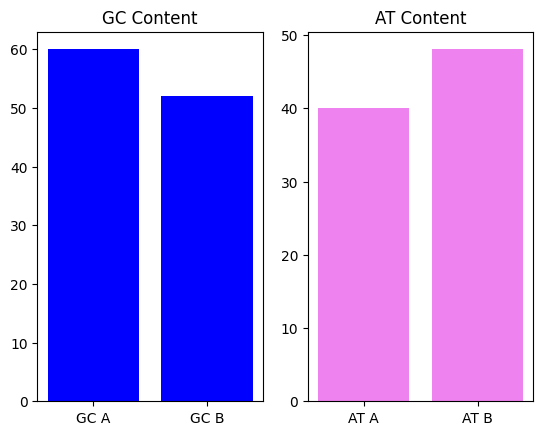

In [8]:
#Protein Explanatory Data Analysis
#GC content
gc_seqA = GC(seqA)
gc_seqB = GC(seqB)

#AT content
def AT_content(input):
    AT = float((input.count('A') + input.count('T'))/len(input))
    return AT

at_seqA = 100*AT_content(seqA)
at_seqB = 100*AT_content(seqB)
print(f"AT content of seqA: {100*AT_content(seqA)}")
print(f"GC content of seqA: {gc_seqA}")
print(f"AT content of seqB: {100*AT_content(seqB)}")
print(f"GC content of seqA: {gc_seqB}")

plt.subplot(1, 2, 1)
plt.bar(['GC A', 'GC B'], [gc_seqA, gc_seqB], color='blue')
plt.title('GC Content')
plt.subplot(1, 2, 2)
plt.bar(['AT A', 'AT B'], [at_seqA, at_seqB], color='violet')
plt.title('AT Content')
plt.show()

Melting temp of SeqA 1760.0 °C
Melting temp of SeqB 7242.0 °C
Molecular weight of SeqA 169793.94369999968
Molecular weight of SeqB 736713.91720001


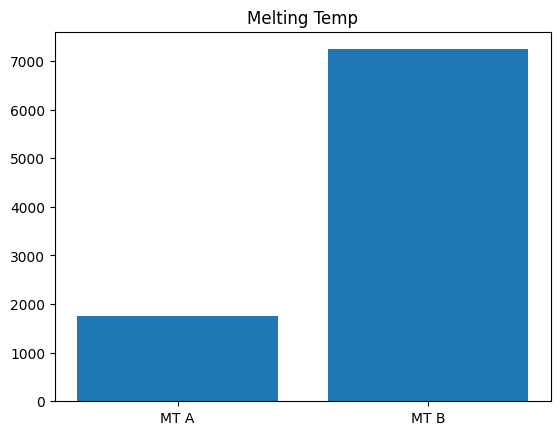

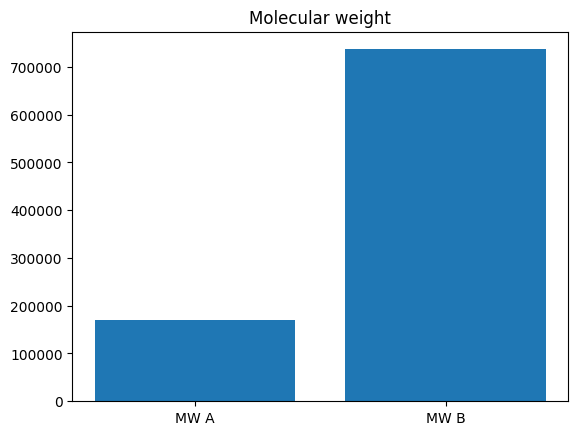

In [12]:
#melting temp
mt_seqA = mt.Tm_Wallace(seqA)
mt_seqB = mt.Tm_Wallace(seqB)

#molecular weight
mw_seqA = mw(seqA)
mw_seqB = mw(seqB)

print(f"Melting temp of SeqA {mt_seqA} °C")
print(f"Melting temp of SeqB {mt_seqB} °C")

print(f"Molecular weight of SeqA {mw_seqA}")
print(f"Molecular weight of SeqB {mw_seqB}")

plt.bar(['MT A', 'MT B'], [mt_seqA, mt_seqB])
plt.title("Melting Temp")
plt.show()

plt.bar(['MW A', 'MW B'], [mw_seqA, mw_seqB])
plt.title("Molecular weight")
plt.show()


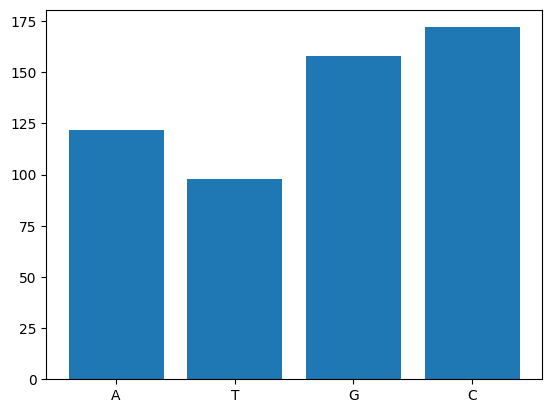

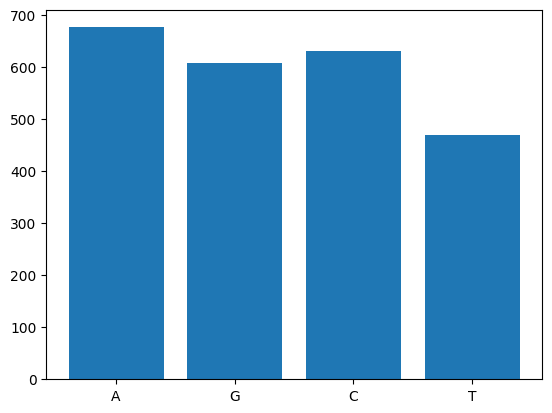

In [14]:
dna_freqA = Counter(seqA)
dna_freqB = Counter(seqB)

plt.bar(dna_freqA.keys(), dna_freqA.values())
plt.show()
plt.bar(dna_freqB.keys(), dna_freqB.values())
plt.show()